In [1]:
using Plots
using Random
using Statistics
using Distributed
using LaTeXStrings  # Sexy Strings !
pyplot()
theme(:dark)

In [2]:
rng = RandomDevice()

RandomDevice(IOStream(<file /dev/urandom>), true)

In [3]:
d = [-1 0; 0 -1; 0 1; 1 0]
# Calculate random motions into the directions given above
motions = d[rand(rng, 1:4, 1000),:]

# accumulate them resulting in all the positions along the particle moves
positions = accumulate(+, motions, dims=1)

# calculate some mins and maxs for a nice plotting window
xmin = minimum(positions[:,1])
xmax = maximum(positions[:,1])
ymin = minimum(positions[:,2])
ymax = maximum(positions[:,2])
totmin = min(xmin, ymin)
totmax = max(xmax, ymax)

30

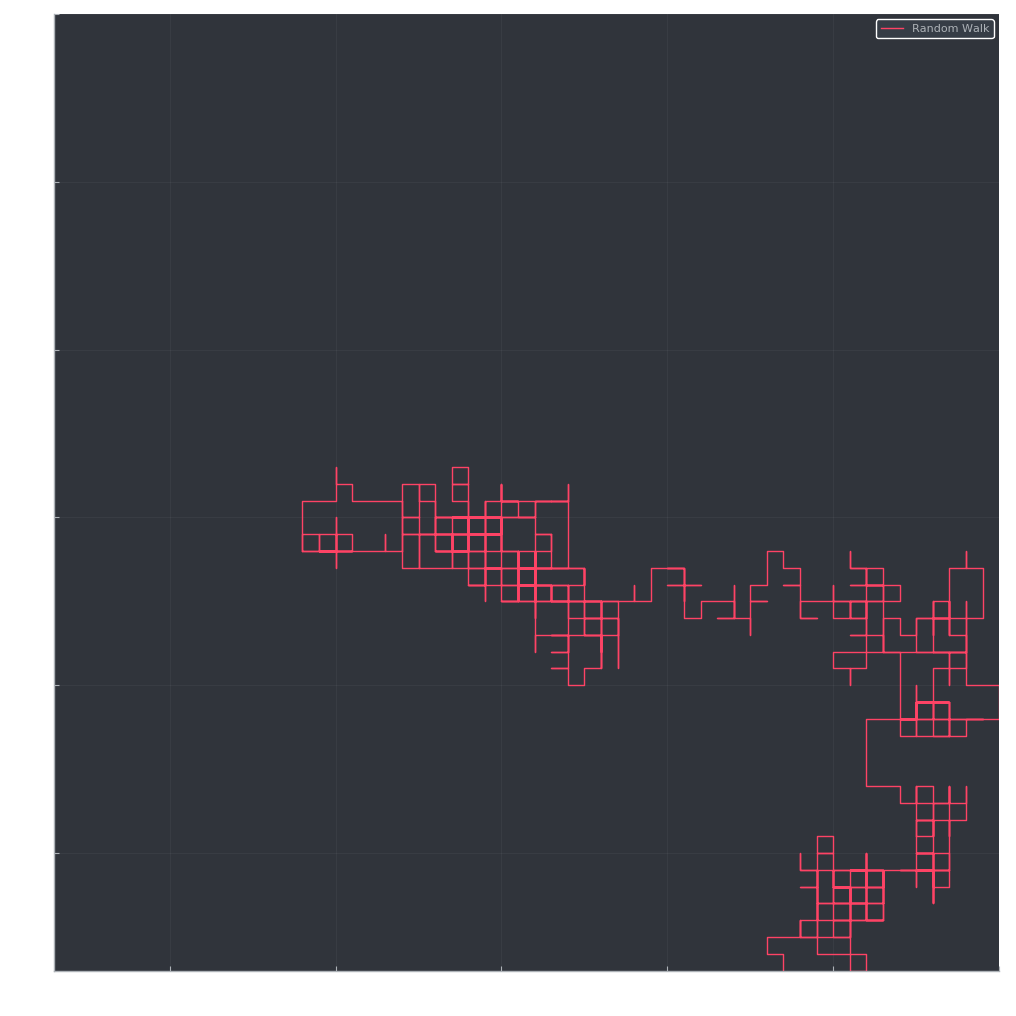

┌ Info: Saved animation to 
│   fn = /home/hmh/git/Thermo_41_42/rwalk.mp4
└ @ Plots /home/hmh/.julia/packages/Plots/cDXot/src/animation.jl:90


Plots.AnimatedGif("/home/hmh/git/Thermo_41_42/rwalk.mp4")

In [4]:
# create an animation showing the motion of the particle
anim = @animate for i in 1:length(positions[:,1])
    plot(
        positions[1:i,1],  # basically plot all positions up to i
        positions[1:i,2],  # yes this can take some time
        xlims=(totmin,totmax),
        ylims=(totmin,totmax),
        size=(1000,1000),
        xlabel="x",
        ylabel="y",
        label="Random Walk"
    )
end
mp4(anim, "rwalk.mp4", fps=120)  # but after all it works \o/

In [5]:
# Now this is more interesting:
# Generate t random motions and summate them to obtain the x and y position.
# Now square x and y and summate them again.
# Repeat this process a thousand times to have a nice mean value.
# Finally create an array containing these meanvalues for all times in
# the range 1 to 10000 separated in 100 steps.
R = map(
    t->mean(sum(sum(d[rand(rng, 1:4, t),:], dims=1).^2) for i in 1:1000),
    1:100:10000
)

100-element Array{Float64,1}:
     1.0  
   103.156
   196.464
   320.516
   381.78 
   504.788
   640.268
   688.992
   816.796
   974.38 
  1004.296
  1096.2  
  1176.916
     ⋮    
  8544.36 
  9110.108
  8976.352
  9762.624
  9702.708
  9234.968
  9557.104
  9191.944
  9371.976
 10032.068
  9783.456
 10103.268

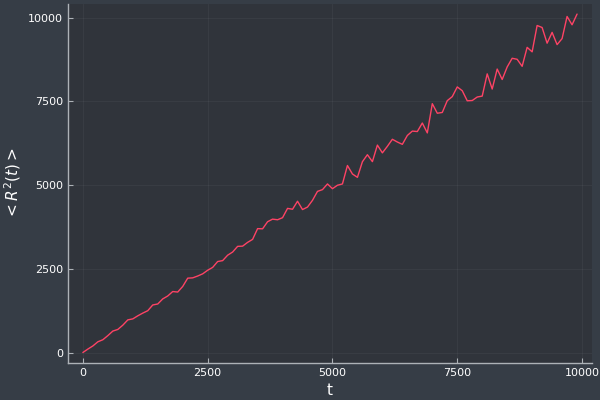

In [6]:
plot(1:100:10000, R, xlabel="t", ylabel=L"<R^2(t)>", label="")

Es handelt sich offenbar um einen linearen Zusammenhang, wie er auch für die Varianz einer Binomialverteilung zu erwarten wäre. Das Gitter wurde hier, da keine Größe vorgegeben wurde, als so groß angenommen, dass kein Teilchen das Gitter innerhalb der gegebenen Zeit verlassen kann.

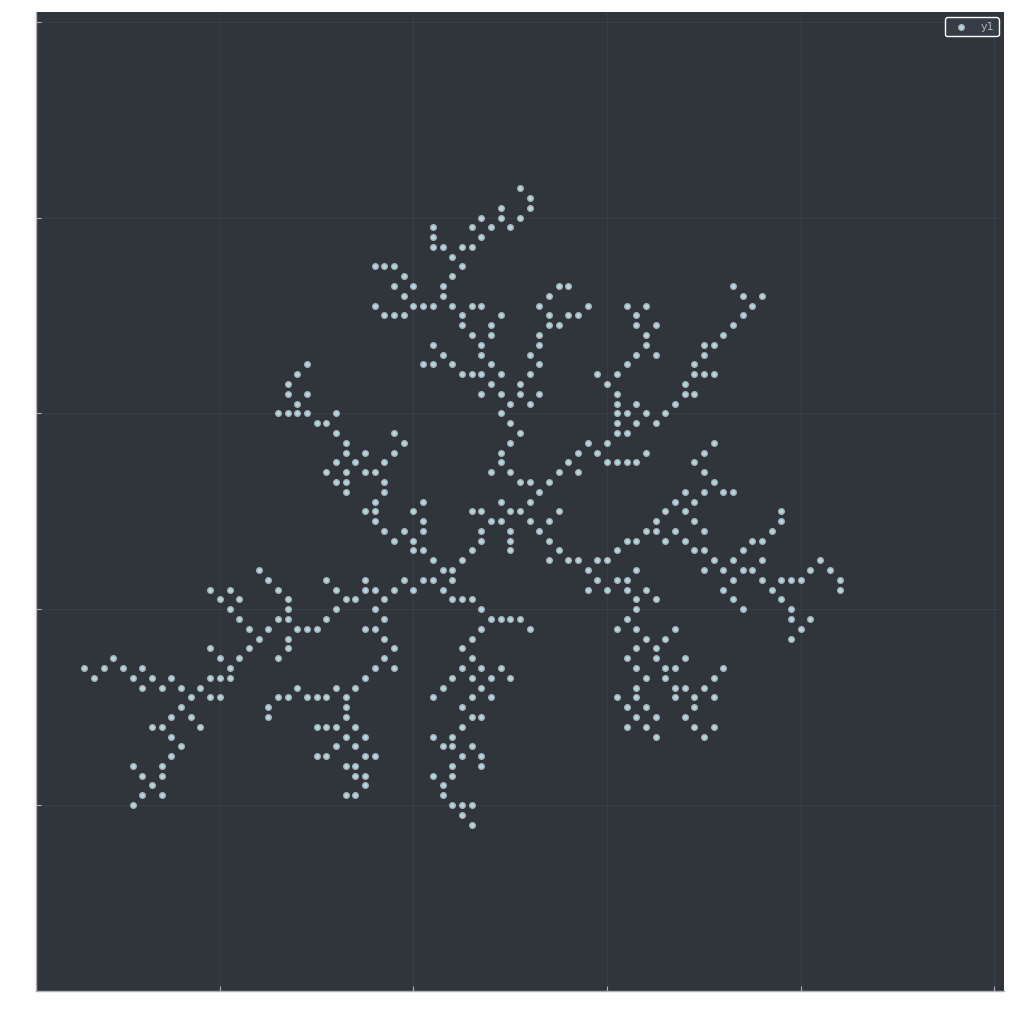

┌ Info: Saved animation to 
│   fn = /home/hmh/git/Thermo_41_42/snowflake.mp4
└ @ Plots /home/hmh/.julia/packages/Plots/cDXot/src/animation.jl:90


Plots.AnimatedGif("/home/hmh/git/Thermo_41_42/snowflake.mp4")

In [7]:
# Define possible motions, Gridsize and the actual Grid
d = [-1 0; 0 -1; 0 1; 1 0]
L = 101
G = falses(L,L)
G[L÷2, L÷2] = true
S = [1:L; 1:L:L*L; L:L:L*L; L*L-L:L*L]
S = Set(map(i->[(i-1)%L+1, (i-1)÷L+1], S))  # These are indices for the borders.

function out_of_bounds(p, L)
    if p[1] < 1 || p[2] < 1 || p[1] > L || p[2] > L
        return true
    end
    return false
end

function freeze(p, G, L)
    # Check if a particle should freeze at the given position.
    d = [-1 0; 0 -1; 0 1; 1 0; -1 -1; -1 1; 1 -1; 1 1]
    for i in 1:8
        neigh = p + d[i,:]
        if !out_of_bounds(neigh, L) && G[neigh[1], neigh[2]]
            return true
        end
    end
    return false
end

# Animationtime !
# For 500 particles:
anim = @animate for n in 1:500
    # Check if we can create particles at the border at all.
    if isempty(S)
        println("Border filled!")
        break
    end
    # get a random startposition at the border
    p = rand(rng, S)
    
    # now Randomwalk till you stick to something
    while true
        m = d[rand(rng, 1:4),:]
        p += m
        if out_of_bounds(p, L)
            p -= m
        elseif freeze(p, G, L)
            G[p[1], p[2]] = true
            if p in S
                pop!(S, p)
            end
            break
        end
    end
    
    # Plot the current snowflake
    snowflake = map(c->[c[1] c[2]], findall(G))
    x = map(t->t[1], snowflake)
    y = map(t->t[2], snowflake)

    plot(
        x,
        y,
        xlims=(1, L),
        ylims=(1, L),
        seriestype=:scatter,
        size=(1000, 1000),
        color="lightblue"  # I guess snowflakes aren't red.
    )
end

mp4(anim, "snowflake.mp4", fps=60)